# Electrical Transmission lines Fault detection

### Introduction

In our ever-advancing society, the escalating demand for electrical power has become a defining characteristic of modern life. The surge in technological advancements, coupled with the continuous expansion of industrial and residential areas, has led to an exponential growth in our reliance on electricity. To meet this burgeoning need, power production sources often reside in regions distant from the major consumption centers, necessitating an intricate network of transmission lines.

Transmission lines at their core, are complexe systems composed of conductors, insulators, and supporting structures that work in concert to facilitate the efficient transfer of electricity over vast distances from the production source to various regions (powering homes, businesses, and critical infrastructure). 

However, the inherent complexity of the electrical power system renders transmission lines susceptible to faults and disturbances. These faults can arise from a variety of factors, including weather conditions, equipment failures, or unforeseen events. The consequences of transmission line faults are profound, potentially leading to power outages that reverberate across vast areas. In an interconnected world heavily dependent on electricity, these disruptions can disrupt industrial operations, compromise communication networks, and impact essential services.

Preventing faults in transmission lines is paramount to maintaining the stability and reliability of the power grid. Proactive measures, such as regular maintenance, technological innovations in monitoring and control systems, and the implementation of protective devices, play a crucial role in averting potential failures. Timely detection and mitigation of faults not only safeguard the integrity of the transmission lines but also prevent cascading effects that could have far-reaching economic and social implications.

### Transmission lines fault

A transmission line fault refers to any abnormal condition or interruption in the normal operation of an electrical transmission line. These faults can manifest as a result of various factors, including equipment malfunctions, environmental conditions (lightning strikes, environmental factors like storms or high winds), or external disturbances (human activities). there are multiple types of transmission line faults bu the most common are: open circuits and short circuits faults.


#### Open circuits faults (series): 

This happens when an unintended connection is created between a conductor and the ground, which causes an interruption in the electrical path.


#### Short circuits faults (shunt): 

An unintended connection occurs between two conductors, resulting in a low-resistance path for current flow. It can be classified into two categories:

1. **Symmetrical Faults:**
   - All phases experience a short circuit either to each other or to the earth, denoted as (L-L-L) or (L-L-L-G).
   - The nature of this fault is balanced, meaning that fault currents in all phases are symmetrical. Their magnitudes are equal, and they are equally displaced by an angle of 120 degrees.
   - Although it is a more severe type of fault, symmetrical faults occur rarely.

2. **Asymmetrical Faults:**
   - Asymmetrical faults involve one or two phases.
   - In this type of fault, the three-phase lines become unbalanced.
   - The main types of asymmetrical faults are line-to-ground (L-G), line-to-line (L-L), and double line-to-ground (LL-G) faults.
   - These types of faults are more common in power systems.
   

## About the Dataset

The data used in this study was extracted from a power system modeled in MATLAB to simulate fault analysis. The power system consists of 4 generators of 11 KV, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line.

The features of the dataset consists of the lines currents and voltages measurments [Ia, Ib, Ic, Va, Vb, Vc].

For the target output we can either use the binary labeled fault detection dataset where 0 indicates no fault and 1 that fault is present (does not matter in which line it occurs), or we can use the multi labeled dataset where we must detect the fault in each line [G C B A], for example: [0 0 0 0] indicates there is no fault at all, [1 0 0 0] is a ground fault, [0 0 0 1] indicates a fault in line A, [1 0 1 1] indicates an LLG fault between the phases A,B and the ground,etc.

## Our Goal

* Explore the relation between lines currents and voltages and the fault status.

* Design binary and multi class fault classification models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls ./transmission_line_fault_detection/

classData.csv*      detect_dataset.csv*


In [3]:
binary_data = pd.read_csv("./transmission_line_fault_detection/detect_dataset.csv")
multiclass_data = pd.read_csv("./transmission_line_fault_detection/classData.csv")

In what follows, we will study each dataset seperately starting with the binary classification problem and then solving the mutli classes classification.

# Binary fault detection

In [4]:
binary_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [5]:
binary_data.shape

(12001, 9)

In [6]:
binary_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Output (S),12001.0,0.457962,0.498250,0.000000,0.000000,0.000000,1.000000,1.000000
Ia,12001.0,6.709369,377.158470,-883.542316,-64.348986,-3.239788,53.823453,885.738571
Ib,12001.0,-26.557793,357.458613,-900.526951,-51.421937,4.711283,69.637787,889.868884
Ic,12001.0,22.353043,302.052809,-883.357762,-54.562257,-0.399419,45.274542,901.274261
Va,12001.0,0.010517,0.346221,-0.620748,-0.237610,0.002465,0.285078,0.609864
Vb,12001.0,-0.015498,0.357644,-0.659921,-0.313721,-0.007192,0.248681,0.627875
Vc,12001.0,0.004980,0.349272,-0.612709,-0.278951,0.008381,0.289681,0.608243
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Given that the studied electrical system is composed of 4 generators of 11 KV each, by looking at the small line voltages shown above we can concluded that their values are normalized.

In [7]:
# Drop last two columns as they don't contain any data
binary_data = binary_data.iloc[:, :-2]

In [8]:
# check if the output classes are balanced
binary_data["Output (S)"].value_counts(normalize=True)

Output (S)
0    0.542038
1    0.457962
Name: proportion, dtype: float64

In [9]:
# Check if there are null values
binary_data.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

It seems that our data doesn't contain any Nan value and the target output is relatively balanced, thus we can move to data exploration.

## Exploratory Data Analysis

In [10]:
df_eda = binary_data.copy()
df_eda["Output"] = df_eda["Output (S)"].map({0: "No Fault", 1: "Fault"})

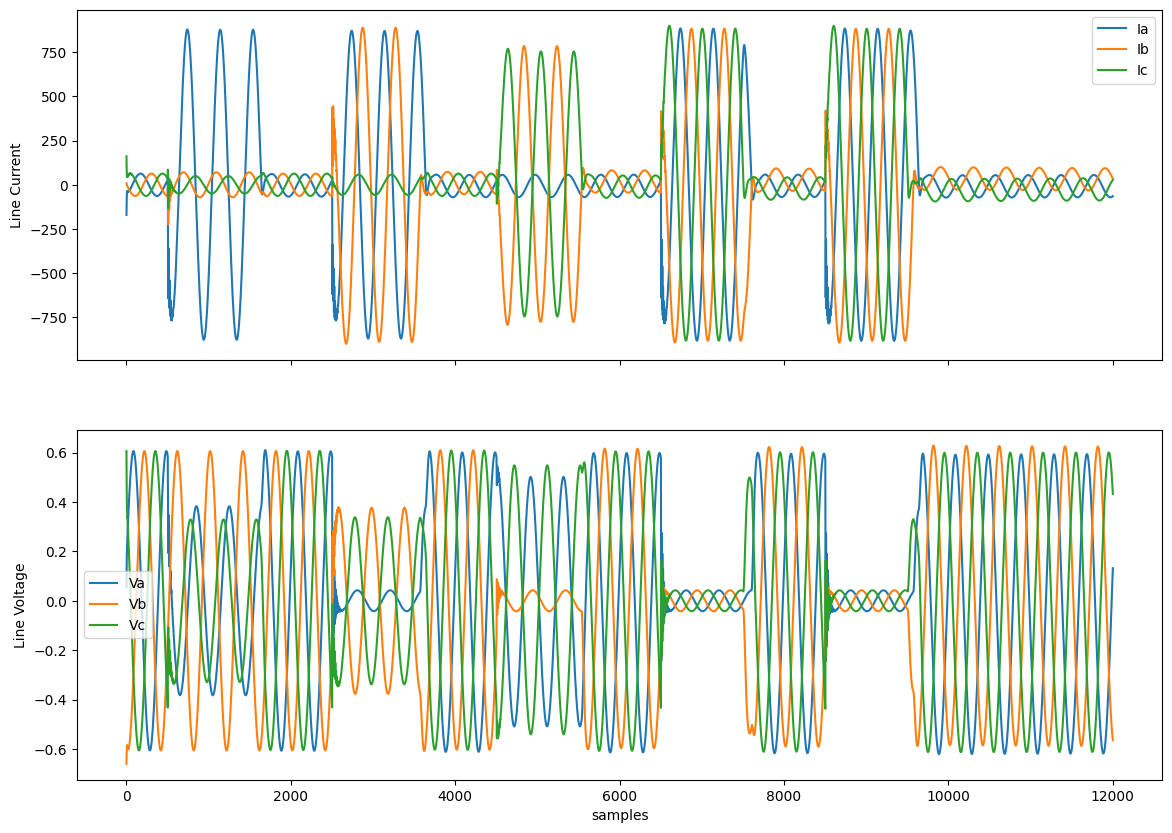

In [11]:
# let's see the lines currents and voltages plots
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
df_eda["Ia"].plot(ax=axs[0])
df_eda["Ib"].plot(ax=axs[0])
df_eda["Ic"].plot(ax=axs[0])
df_eda["Va"].plot(ax=axs[1])
df_eda["Vb"].plot(ax=axs[1])
df_eda["Vc"].plot(ax=axs[1])
axs[0].set_ylabel("Line Current")
axs[1].set_ylabel("Line Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

Observing the sinusoidal forms of currents and voltages, as anticipated, whenever there are fluctuations in either the current or voltage it's an indication of a fault in the line. It appears challenging to gain insights into line faults by further examining these plots. Therefore, our focus will shift to analyzing each line individually.

### Line A

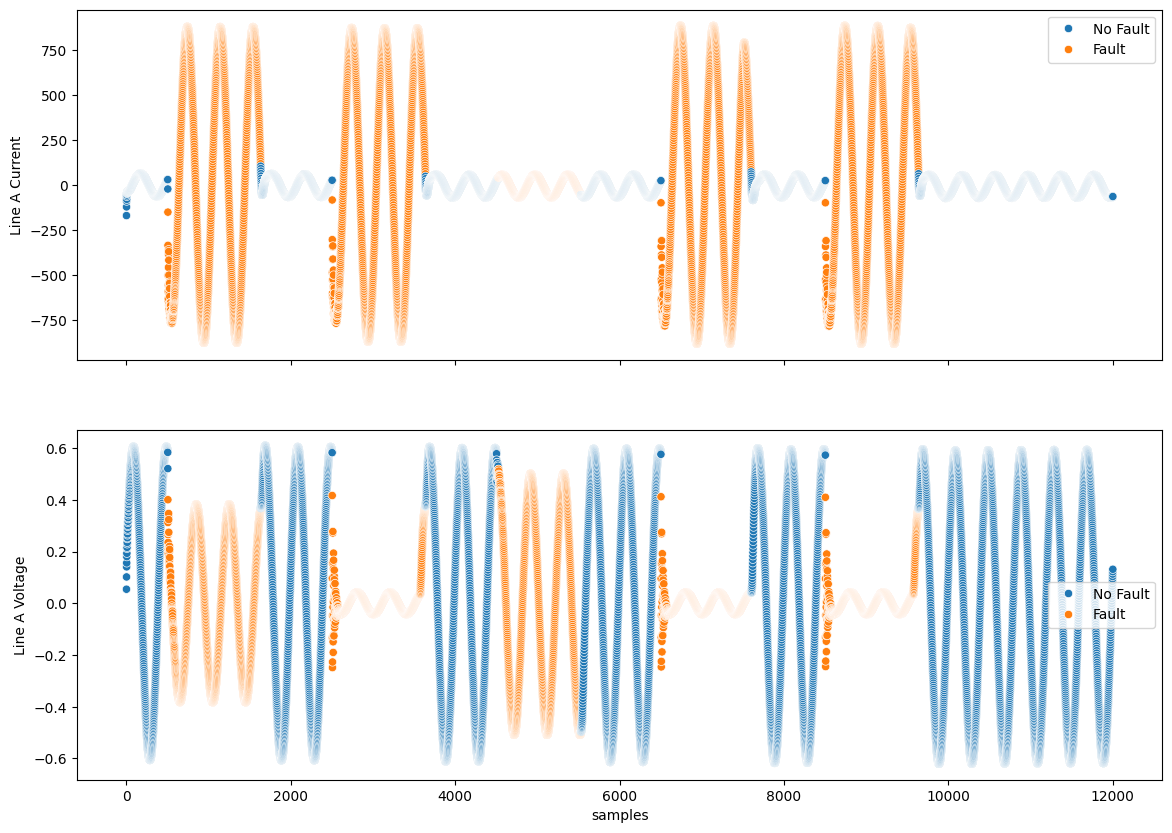

In [12]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ia", x=binary_data.index, hue='Output', ax=axs[0])
sns.scatterplot(data=df_eda, y="Va", x=binary_data.index, hue='Output', ax=axs[1])
axs[0].set_ylabel("Line A Current")
axs[1].set_ylabel("Line A Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

### Line B

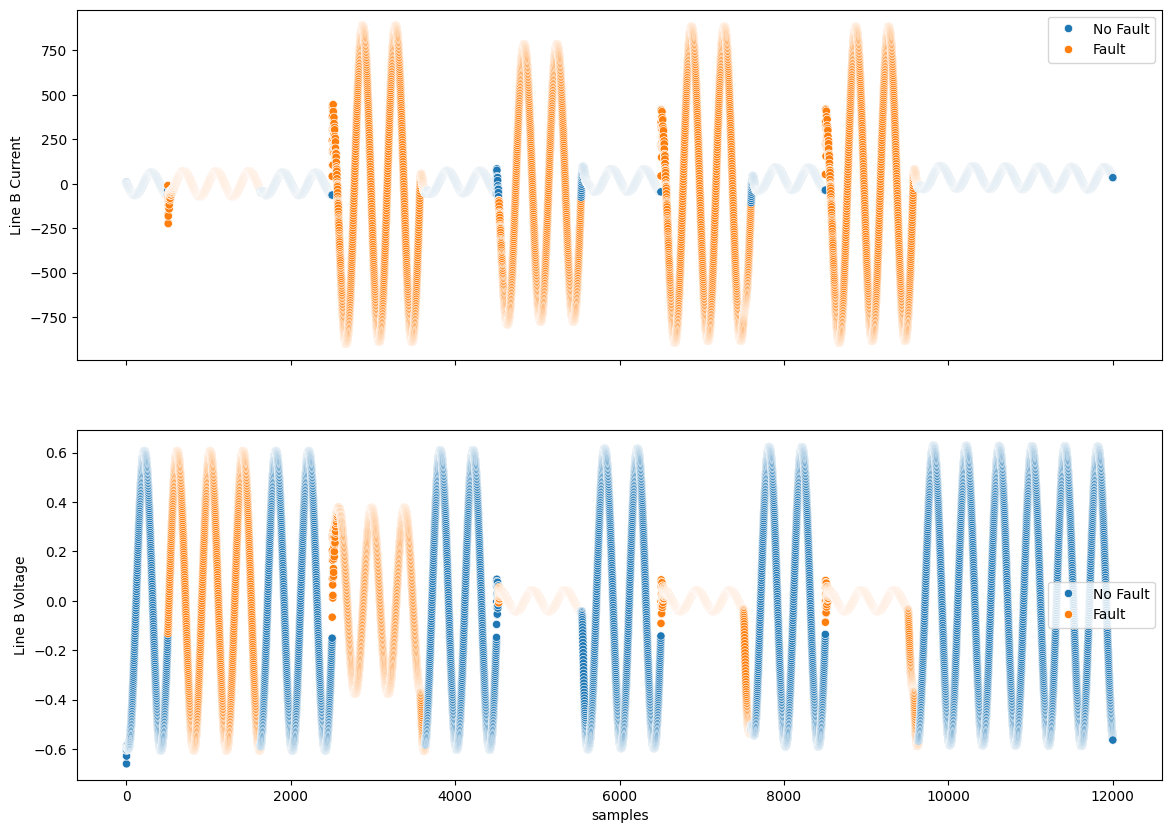

In [13]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ib", x=binary_data.index, hue='Output', ax=axs[0])
sns.scatterplot(data=df_eda, y="Vb", x=binary_data.index, hue='Output', ax=axs[1])
axs[0].set_ylabel("Line B Current")
axs[1].set_ylabel("Line B Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

### Line C

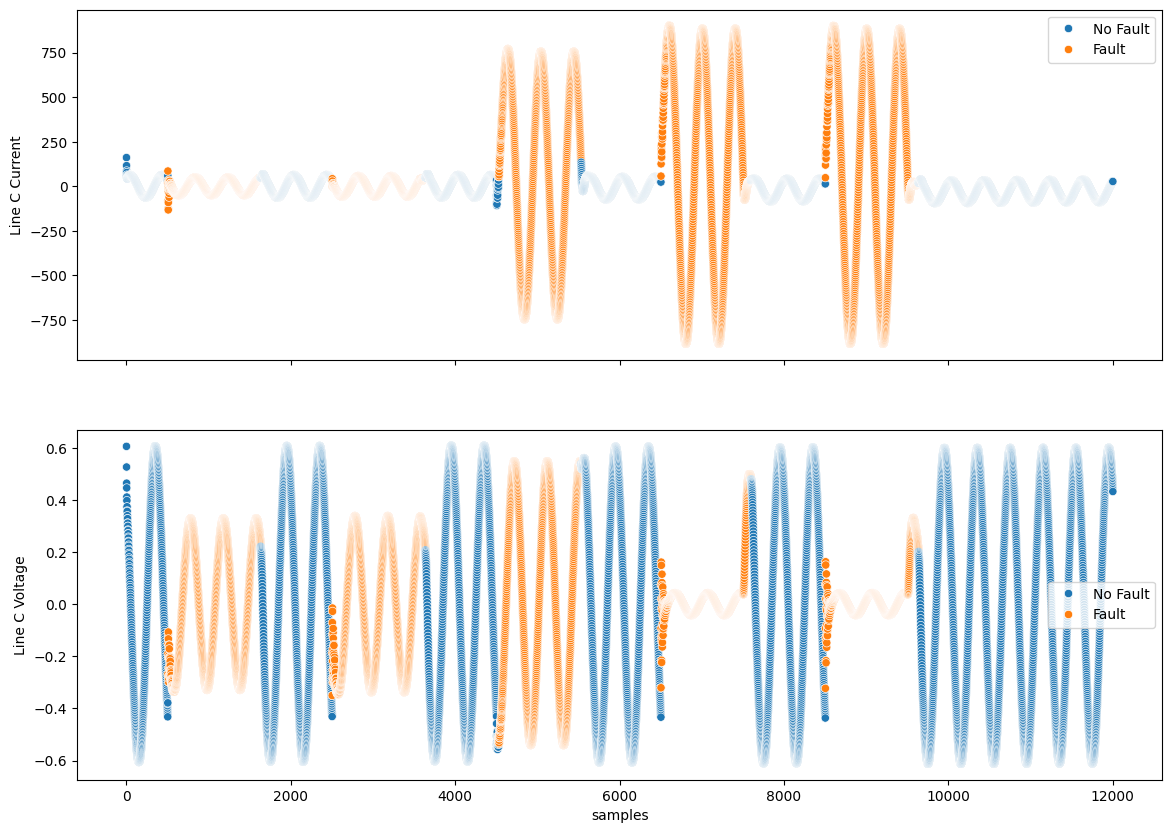

In [14]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ic", x=binary_data.index, hue='Output', ax=axs[0])
sns.scatterplot(data=df_eda, y="Vc", x=binary_data.index, hue='Output', ax=axs[1])
axs[0].set_ylabel("Line C Current")
axs[1].set_ylabel("Line C Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

#### Observation

* The plotted lines suggest that a line undergoes a fault when there is a swift decline in voltage accompanied by a rapid surge in current, or vice versa.

* During a fault occurrence, the current peaks significantly while the voltage exhibits smaller peaks. Under normal conditions (no fault), both current and voltage follow a sinusoidal pattern, with consistent highs and lows in each period.

<Axes: xlabel='Vc', ylabel='Count'>

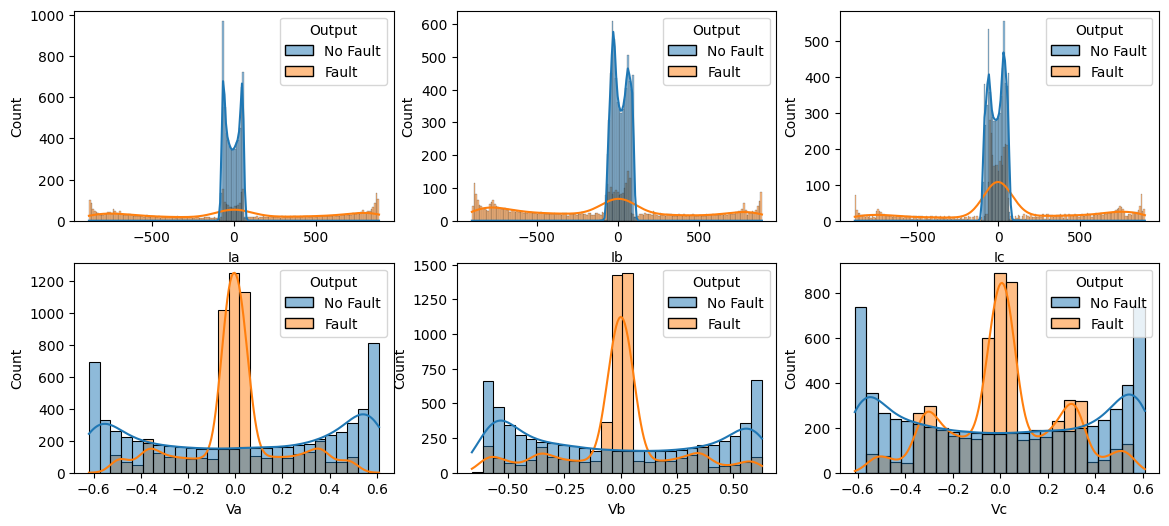

In [15]:
# Lines currents and voltages distributions (Fault vs No Fault)
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
sns.histplot(data=df_eda, x="Ia", hue='Output', kde=True, ax=axes[0, 0])
sns.histplot(data=df_eda, x="Ib", hue='Output', kde=True, ax=axes[0, 1])
sns.histplot(data=df_eda, x="Ic", hue='Output', kde=True, ax=axes[0, 2])
sns.histplot(data=df_eda, x="Va", hue='Output', kde=True, ax=axes[1, 0])
sns.histplot(data=df_eda, x="Vb", hue='Output', kde=True, ax=axes[1, 1])
sns.histplot(data=df_eda, x="Vc", hue='Output', kde=True, ax=axes[1, 2])

#### Observation

* The distribution plot validates our earlier observation, indicating that when a line experiences a fault, the current reaches higher peaks (or lower lows if negative). This is evident in the fault distribution, which spreads across the entire range. Conversely, when the line is stable, the current distribution remains constant, resembling a normal distribution.

* The voltage distribution plot further supports this insight, illustrating that during a fault, the voltage deviates from its normal condition values, exhibiting a significant decrease.

<Axes: >

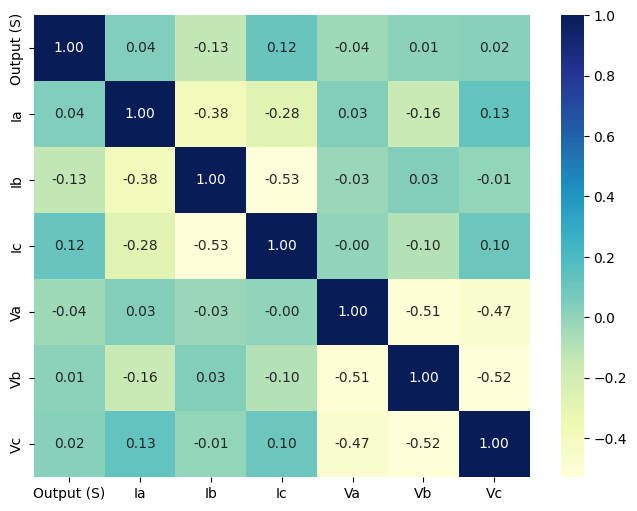

In [16]:
# Let's see the correlation between our features
plt.figure(figsize=(8, 6))
sns.heatmap(binary_data.corr(), cmap='YlGnBu', fmt='.2f', annot=True)

#### Observation

* There appears to be no discernible correlation between our features (lines current & voltage) and the target fault class.

* While the features show generally low correlation, an exception is noted for the current or voltage between two different phases, aligning with expectations. This correlation is logical as these features exhibit the same evolution but are phased by 120° (three-phase theory).

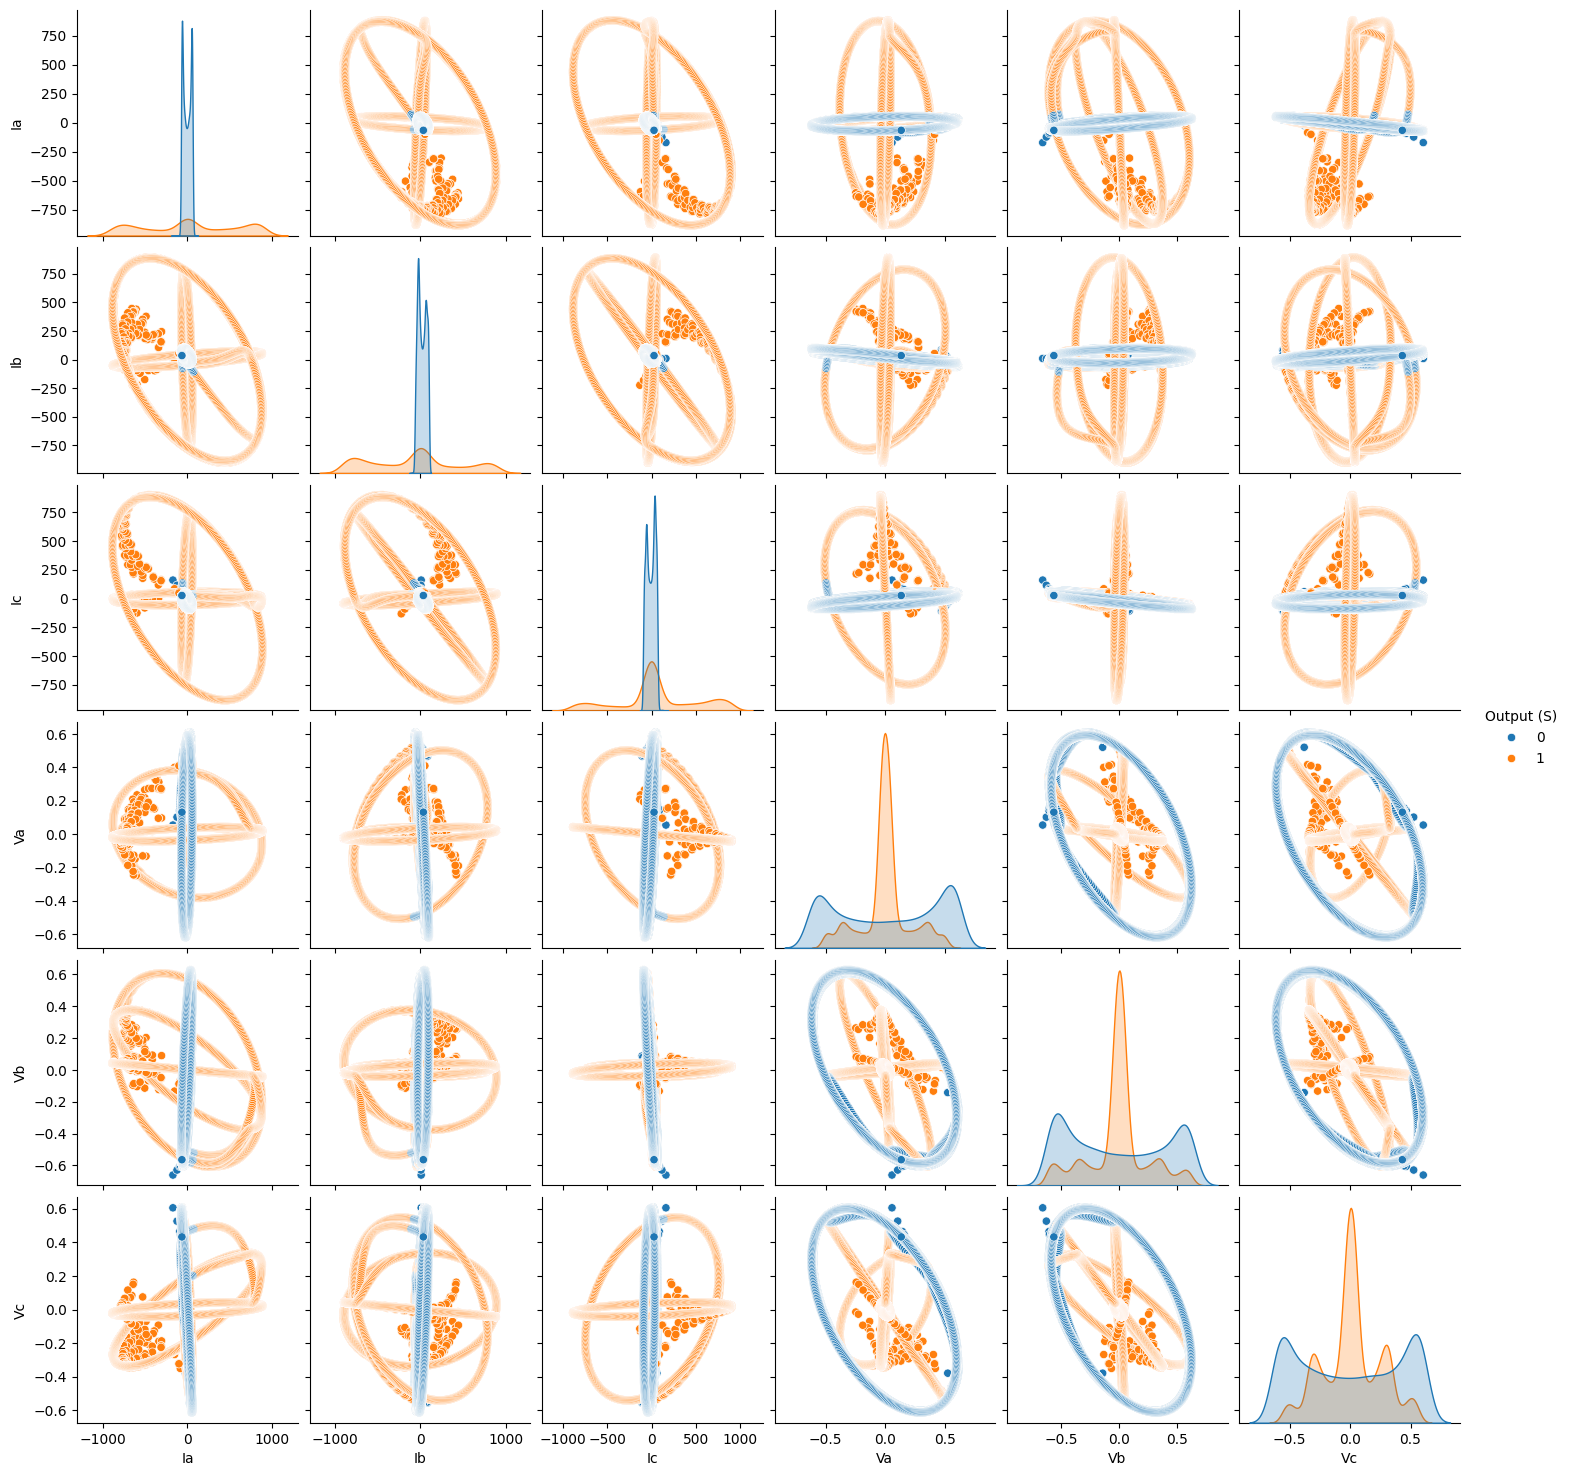

In [17]:
# plot features distribution
sns.pairplot(binary_data, hue='Output (S)')

## Building ML models

In [18]:
target = binary_data["Output (S)"]
X = binary_data.drop(["Output (S)"], axis=1)

In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into 3 part : Training(80%), Testing(20%)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

labels = ["No Fault", "Fault"]

def accuracy_logs(y_test, y_pred):
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print("Metrics table:\n", classification_report(y_test, y_pred, target_names=labels))

def draw_confusion_matrix(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(matrix, index=labels, columns=labels)
    plt.figure(figsize=(6, 4))
    plot = sns.heatmap(matrix, cmap='YlGnBu', fmt='.2f', annot=True)
    plot.set_xlabel('Predicted')
    plot.set_ylabel('Real')

### Logistic Regression Classifier

In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.7396917950853811
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.68      1.00      0.81      1325
       Fault       1.00      0.42      0.59      1076

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



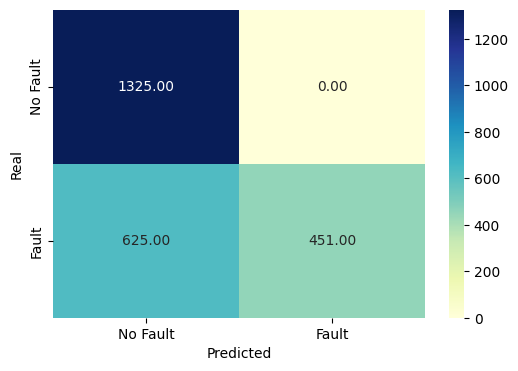

In [24]:
draw_confusion_matrix(y_test, y_pred)

### Support Vector Machine

In [25]:
svc_Cla = SVC()
svc_Cla.fit(x_train, y_train)
y_pred = svc_Cla.predict(x_test)

In [26]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9775093710953769
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.96      1.00      0.98      1325
       Fault       1.00      0.95      0.97      1076

    accuracy                           0.98      2401
   macro avg       0.98      0.97      0.98      2401
weighted avg       0.98      0.98      0.98      2401



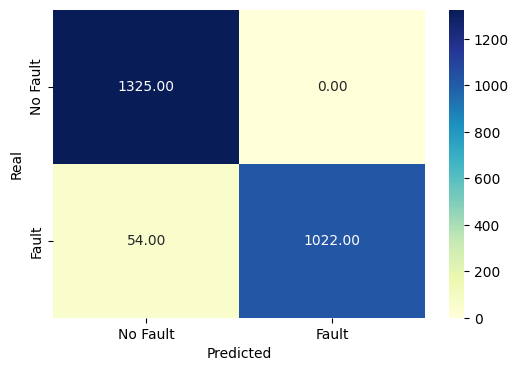

In [27]:
draw_confusion_matrix(y_test, y_pred)

### Decision Tree Classifier

In [28]:
dtree_cla = DecisionTreeClassifier(random_state=0)
dtree_cla.fit(x_train, y_train)
y_pred = dtree_cla.predict(x_test)

In [29]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9933361099541858
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99      1325
       Fault       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



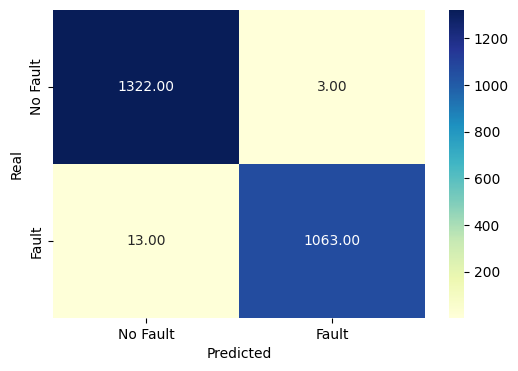

In [30]:
draw_confusion_matrix(y_test, y_pred)

### Random Forest Classifier

In [31]:
rf_Cla = RandomForestClassifier(random_state=0)
rf_Cla.fit(x_train, y_train)
y_pred = rf_Cla.predict(x_test)

In [32]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9941690962099126
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99      1325
       Fault       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



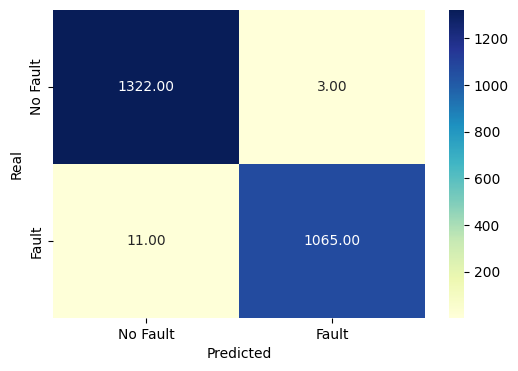

In [33]:
draw_confusion_matrix(y_test, y_pred)

### XGBoost Classifier

In [34]:
xgb_Cla = XGBClassifier()
xgb_Cla.fit(x_train, y_train)
y_pred = xgb_Cla.predict(x_test)

In [35]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9941690962099126
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99      1325
       Fault       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



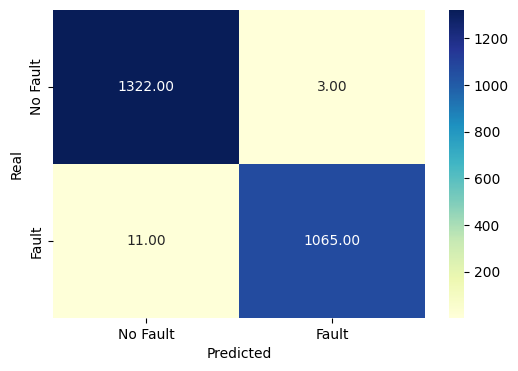

In [36]:
draw_confusion_matrix(y_test, y_pred)

#### Observations

* The logistic regression classifier yielded a suboptimal accuracy result of only 73% and an unsatisfactory recall score of 42%. This is particularly problematic since we prioritize minimizing false negatives, even if it means accepting an increase in false positives—instances where the model predicts a fault when none exists.

* In contrast, the SVM classifier demonstrated significantly improved performance with an accuracy of 97.7% and a high recall score of 95%. However, it still failed to detect faults in 54 instances, falling short of our goal for comprehensive fault detection.

* The last three models—Decision Tree, Random Forest, and XGBoost—delivered the highest accuracy results so far (99.3%, 99.4%, 99.4%). And all three models achieved an impressive recall score of 99%.

* While the Decision Tree failed to detect 13 faulty lines, both Random Forest and XGBoost missed 12 faulty lines. Although these numbers could be deemed acceptable relative to the total faulty lines, there is room for improvement through further model tuning.

* Notably, the minimal number of false positives (3) generated by the models (Decision Tree, Random Forest, XGBoost) is not a significant concern, as these instances will not result in actual power outages.

#### Conclusion

We have achieved remarkable accuracy results of 99.4% and a recall score of 99% with two models, Random Forest and XGBoost. Considering these outcomes as satisfactory, we have decided not to delve into further hyperparameter tuning. Our focus will now shift directly to addressing the multi-class fault detection problem.

# Multi class fault detection

In [37]:
multiclass_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
